# Limpieza y EDA

En este notebook realizamos el feature engineering correspondiente para poder trabajar los modelos. Además, hacemos gráficas para entenderlo, usando varias hipótesis.

# Librerias

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# Limpieza

In [2]:
df = pd.read_csv('../data/raw/healthcare-dataset-raw.csv')
pd.set_option('display.max_columns', 500)

In [3]:
df.head(5)

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,RaceEthnicityCategory,AlcoholDrinkers
0,Female,Good,Age 80 or older,1.55,79.379997,33.070000,0,0,0,0,0,0,1,No,Never smoked,"White only, Non-Hispanic",0
1,Female,Good,Age 80 or older,1.63,88.000000,33.299999,0,0,1,0,0,0,0,Yes,Never smoked,"Black only, Non-Hispanic",0
2,Male,Very good,Age 80 or older,1.73,91.169998,30.559999,0,0,1,0,0,0,0,No,Never smoked,"White only, Non-Hispanic",0
3,Female,Excellent,Age 75 to 79,1.68,58.970001,20.980000,0,0,0,0,0,0,0,Yes,Former smoker,"White only, Non-Hispanic",0
4,Male,Poor,Age 55 to 59,1.85,68.040001,19.790001,1,0,1,0,0,0,0,No,Current smoker - now smokes every day,"White only, Non-Hispanic",0


# Feature engineering

1. Género o sexo: lo pasaremos a una variable categórica nóminal.

In [4]:
df.insert(1, 'gender_num', np.where(df['Sex'] == 'Male',1, 0))

2. Salud géneral: Nivel de salud que lleva el usuario, de mal a excelente.

In [5]:
df['GeneralHealth'].unique()

array(['Good', 'Very good', 'Excellent', 'Poor', 'Fair'], dtype=object)

In [6]:
generalHealth_map = {
    "Poor": 5,
    "Fair": 4,
    "Good": 3,
    "Very good": 2,
    "Excellent": 1
}
df.insert(3, 'GeneralHealth_type', df['GeneralHealth'].map(generalHealth_map))

3. Categorias de edad: Agruparemos aún más estas categorias, de joven a adulto mayor.

In [7]:
df['AgeCategory'].unique()

array(['Age 80 or older', 'Age 75 to 79', 'Age 55 to 59', 'Age 65 to 69',
       'Age 60 to 64', 'Age 50 to 54', 'Age 70 to 74', 'Age 45 to 49',
       'Age 30 to 34', 'Age 18 to 24', 'Age 40 to 44', 'Age 25 to 29',
       'Age 35 to 39'], dtype=object)

In [8]:
conditions = [
    (df['AgeCategory'].str.contains("18|24|25|29|30|34|35|39")),
    (df['AgeCategory'].str.contains("40|44|45|49|50|54|55|59")),
    (df['AgeCategory'].str.contains("60|64|65|69|70|74|75|79]")),
    (df['AgeCategory'].str.contains("80|older"))
]
values = [1, 2, 3, 4]
df.insert(5, 'AgeGroup', np.select(conditions, values))

4. Grupos de diabetes: en función si tiene o no diabetes, entre otros.

In [9]:
df['HadDiabetes'].unique()

array(['No', 'Yes', 'Yes, but only during pregnancy (female)',
       'No, pre-diabetes or borderline diabetes'], dtype=object)

In [10]:
diabetes_map = {
    "No": 0,
    "Yes, but only during pregnancy (female)": 1,
    "No, pre-diabetes or borderline diabetes": 2,
    "Yes": 3
}
df.insert(df.columns.get_loc('HadDiabetes') + 1, 'diabetesGroup', df['HadDiabetes'].map(diabetes_map))

5. Grupos de fumadores: en función si ha fumado o no, entre otros

In [11]:
df['SmokerStatus'].unique()

array(['Never smoked', 'Former smoker',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [12]:
smoker_map = {
    "Never smoked": 0,
    "Former smoker": 1,
    "Current smoker - now smokes some days": 2,
    "Current smoker - now smokes every day": 3
}
df.insert(df.columns.get_loc('SmokerStatus') + 1, 'SmokerGroup', df['SmokerStatus'].map(smoker_map))

6. Grupos de raza y étnia: aunque en ética de Machine learning no deberia ser una variable predictora, en el caso que nos concierne si lo es. En los EE.UU., los ACV son más comunes en adultos de raza negra, nativos de Alaska, indios originarios de EE. UU. e hispanos que en adultos de raza blanca.

In [13]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [14]:
race_ethnicity_map = {
    "White only, Non-Hispanic": 1,
    "Other race only, Non-Hispanic": 1,
    "Hispanic": 2,
    "Multiracial, Non-Hispanic": 3,
    "Black only, Non-Hispanic": 4
}
df.insert(df.columns.get_loc('RaceEthnicityCategory') + 1, 'raceEthnicityGroup', df['RaceEthnicityCategory'].map(race_ethnicity_map))

* **White only, Non-Hispanic** - Personas blancas, no hispanas (generalmente presentan un riesgo menor de ACV comparado con otros grupos, aunque sigue habiendo factores de riesgo individuales).
* **Other race only, Non-Hispanic** - Personas de otras razas, no hispanas (esta categoría varía mucho en función de las poblaciones específicas incluidas, pero en general se considera de menor riesgo que otros grupos con factores de riesgo específicos).
* **Hispanic - Personas hispanas** (riesgo de ACV moderado; los hispanos tienden a presentar factores de riesgo como diabetes y obesidad, pero el riesgo de ACV puede variar considerablemente dentro de esta población).
* **Multiracial, Non-Hispanic** - Personas multirraciales, no hispanas (el riesgo varía, pero en general tiende a ser mayor debido a factores socioeconómicos y acceso desigual a la atención médica).
* **Black only, Non-Hispanic** - Personas negras, no hispanas (mayor riesgo de ACV debido a una combinación de factores genéticos, mayor prevalencia de hipertensión y diabetes, y, en muchos casos, barreras en el acceso a la atención de salud).

7. Rangos de bmi: separación de bmi

In [15]:
bins = [0,18.5, 25, 30, 40, float('inf')] 
etiquetas = [0, 1, 2, 3, 4]
df.insert(df.columns.get_loc('BMI') + 1, 'BmiRange', pd.cut(df['BMI'], bins=bins, labels=etiquetas, right=False).astype(int))

# Visualización (EDA)

<Axes: >

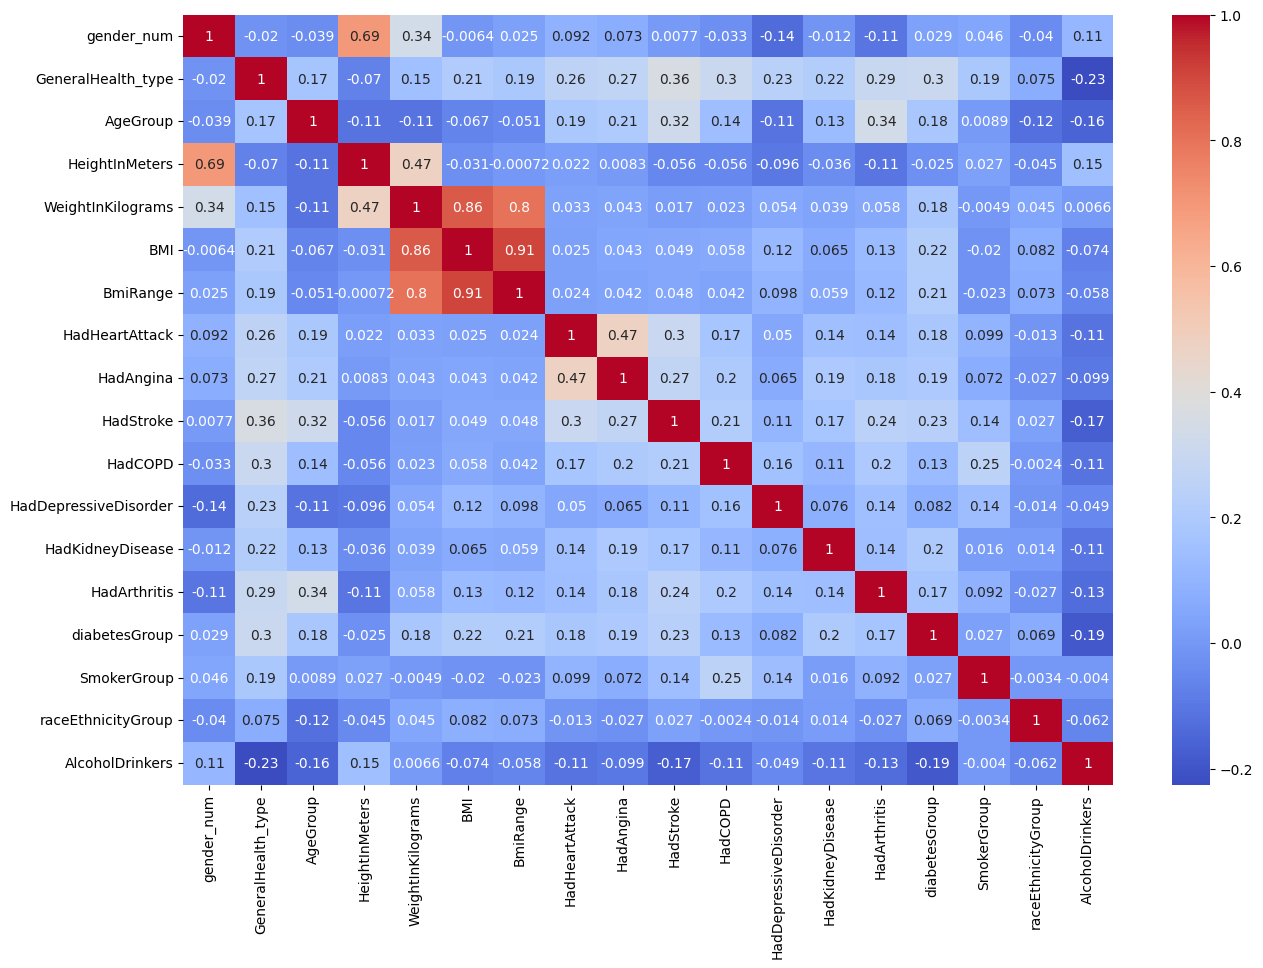

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [17]:
# Guardado de CSV ya procesado
df.to_csv('../data/processed/healthcare-dataset-processed.csv', index=False)

In [18]:
# Separación de train y test
train,test = train_test_split(df, test_size=0.20, random_state=42)
train.to_csv('../data/train/train.csv', index=False)
test.to_csv('../data/test/test.csv', index=False)

Con estos datasets ya separados, podremos hacer un train test mucho más completo y generalizando los resultados.